# **DMDW LAB ASSIGNMENT** 

**BY: ARMAAN ARYA**

**SEMESTER- 5TH**


**SECTION- 'D'**



**ROLL NO-20CSE116**

# **PREDICTION AND ALGORITHM IMPLIMENTATION OVER HEART ATTACK DATA**



**ALGORITHMS:**


**NAVIE BAYES**


**DESICION TREE**



**KNN ALGORITHM**

In [1]:
#import all the reqiured lib for the data preporcessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset

df = pd.read_csv(r"C:\Users\91824\Downloads\heart.csv")


In [3]:
#lets now visualize the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Inslights of the dataset**

**ATTRIBUTES OF DATASET**


Now lets us explore the attributes of our dataset:

age - age in years

sex - sex (1 = male; 0 = female)

cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

thalach - maximum heart rate achieved

exng - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slp - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

caa - number of major vessels (0-3) colored by flourosopy

thall - 2 = normal; 1 = fixed defect; 3 = reversable defect

output - the predicted attribute - diagnosis of heart disease 

In [4]:
#This is the stastical value of the dataset
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#check for any null values in the dataset
print("Check for null or missing values")
df.isnull().sum()

Check for null or missing values


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
print(" shape of dataset: " ,df.shape)

 shape of dataset:  (303, 14)


In [8]:
#Now let us find how many unique elements are there in each attribute
uniq_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    uniq_number.append(x)

pd.DataFrame(uniq_number, index = df.columns, columns=['Total Unique Values'])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [9]:
# this is out the targeted attribute
df['output'].unique()

array([1, 0], dtype=int64)

**EDA - EXPLOTARY DATA ANALYSIS**


**NOW LETS VISUALISE THE DATASET**

<AxesSubplot:xlabel='output', ylabel='count'>

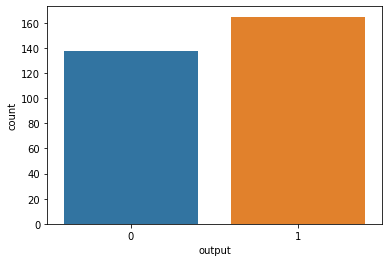

In [10]:
sns.countplot(x=df['output'])


C:\Users\91824\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91824\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91824\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91824\anaconda3\lib\si

<AxesSubplot:xlabel='cp'>

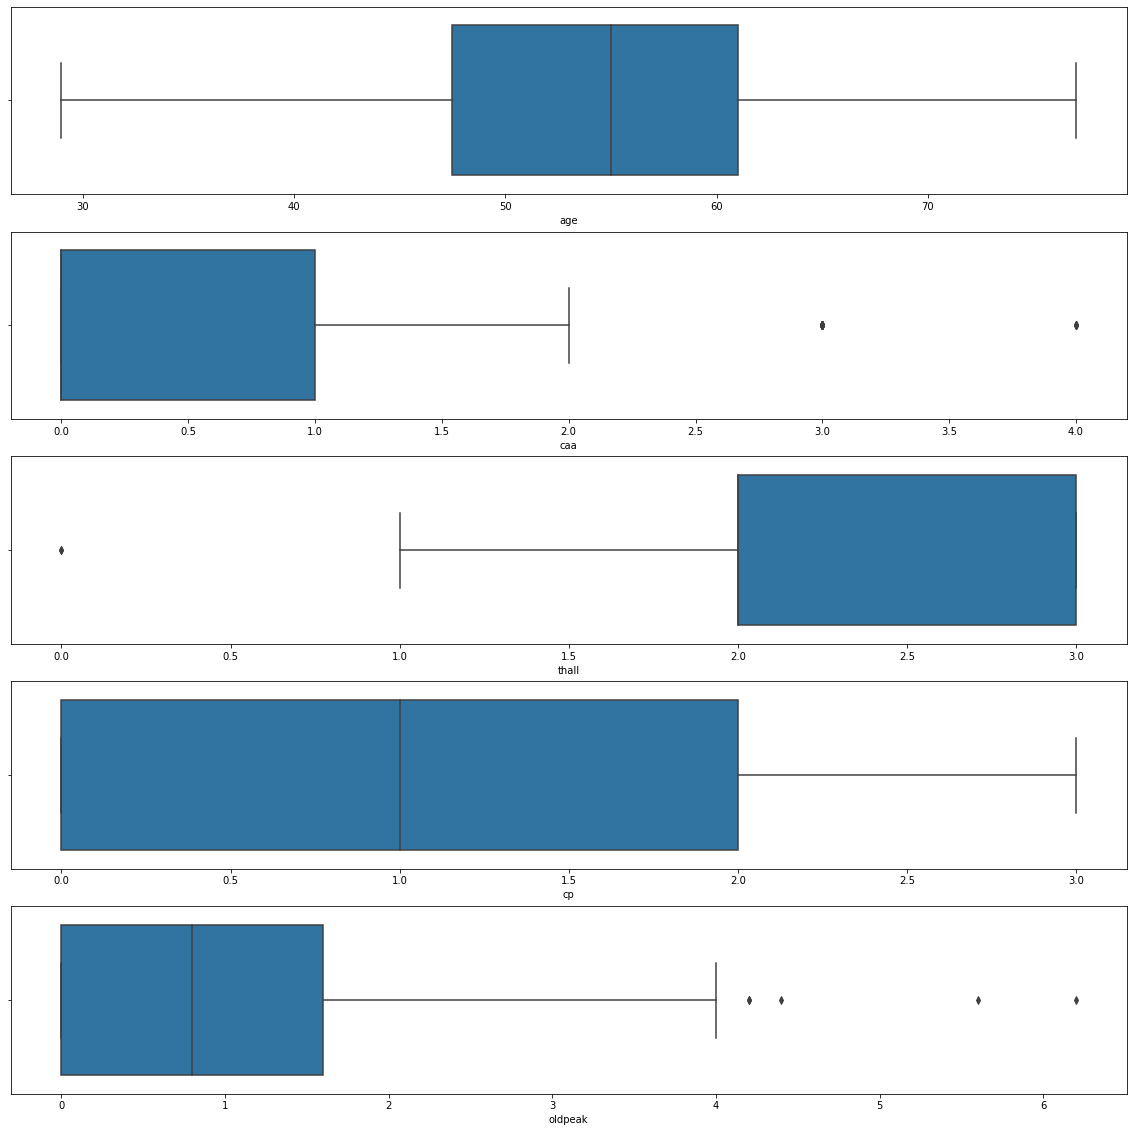

In [38]:
#Box plot representation of the feature attributre

f, axes = plt.subplots(5,1,figsize = (20,20))
sns.boxplot(df['oldpeak'],ax=axes[4])
sns.boxplot(df['age'], ax=axes[0])
sns.boxplot(df['caa'],ax=axes[1])
sns.boxplot(df['thall'], ax=axes[2])
sns.boxplot(df['cp'],ax=axes[3])


<AxesSubplot:xlabel='cp', ylabel='output'>

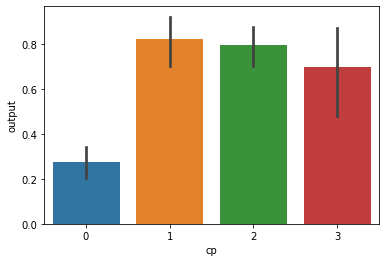

In [13]:

sns.barplot(x=df["cp"],y=df["output"])

<AxesSubplot:xlabel='restecg', ylabel='output'>

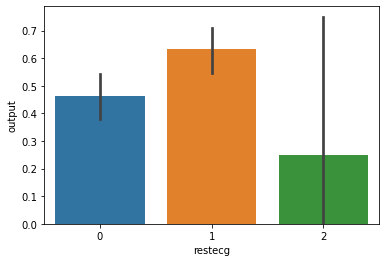

In [14]:
sns.barplot(x=df["restecg"],y=df["output"])

<AxesSubplot:xlabel='caa', ylabel='output'>

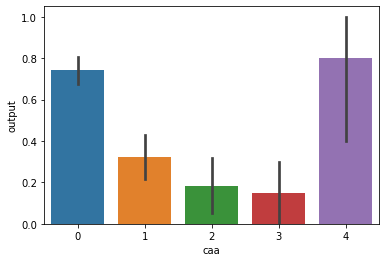

In [18]:
sns.barplot(x=df["caa"],y=df["output"])

<AxesSubplot:xlabel='sex', ylabel='output'>

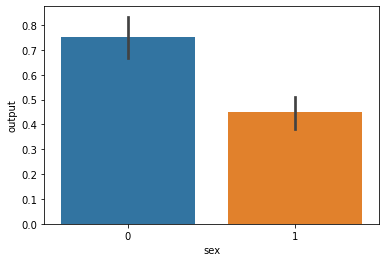

In [12]:
# Barplot Representation of Targeted Attribute vs Feature Attribute

sns.barplot(x=df["sex"],y=df["output"])

<AxesSubplot:xlabel='exng', ylabel='output'>

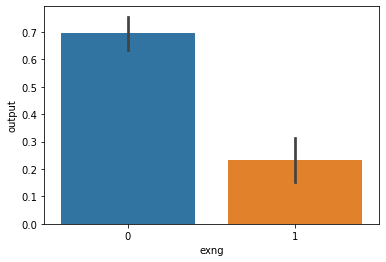

In [15]:
sns.barplot(x=df["exng"],y=df["output"])

<AxesSubplot:xlabel='slp', ylabel='output'>

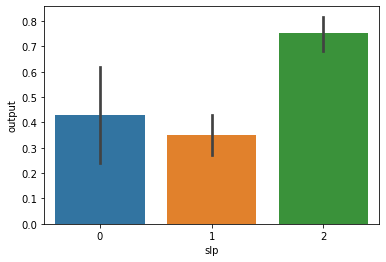

In [17]:
sns.barplot(x=df["slp"],y=df["output"])

<AxesSubplot:xlabel='thall', ylabel='output'>

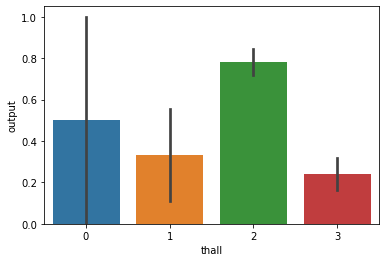

In [19]:
sns.barplot(x=df["thall"],y=df["output"])

<AxesSubplot:xlabel='fbs', ylabel='output'>

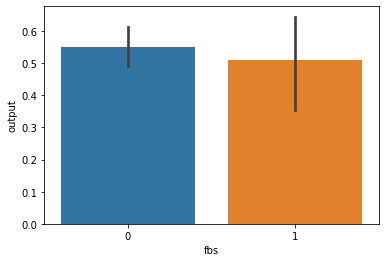

In [16]:
sns.barplot(x=df["fbs"],y=df["output"])

**TRAIN AND TEST SPLIT OF DATASET**

In [20]:
from sklearn.model_selection import train_test_split   #import the fuction to split the data
features_df = df.drop("output",axis=1)  # select all the attributes except the targeted attribute
target= df["output"]

X_train, X_test, Y_train, Y_test = train_test_split(features_df, target, test_size=0.20,random_state=0)

In [21]:
# Now lets visualize the training dataset and testing dataset
print("SHAPE OF FEATURE TRAINING DATASET:",X_train.shape)
print("SHAPE OF FEATURE TESTING DATASET : ",X_test.shape)
print("SHAPE OF TARGETED TRAINING DATASET : ",Y_train.shape)
print("SHAPE OF TARGETED TESTING DATASET : ",Y_test.shape)

SHAPE OF FEATURE TRAINING DATASET: (242, 13)
SHAPE OF FEATURE TESTING DATASET :  (61, 13)
SHAPE OF TARGETED TRAINING DATASET :  (242,)
SHAPE OF TARGETED TESTING DATASET :  (61,)


**NAVIE BAYES CLASSIFER IMPLIMENTATION**

In [24]:
from sklearn.naive_bayes import GaussianNB
nab = GaussianNB()

In [27]:
from sklearn.metrics import accuracy_score
nab.fit(X_train,Y_train)
nab_prediction = nab.predict(X_test)
accuracy_nab = round(accuracy_score(nab_prediction,Y_test)*100,2)
print("THE ACCURACY OF NAIVE BAYES: "+str(accuracy_nab)+" %")

THE ACCURACY OF NAIVE BAYES: 85.25 %


**DECISION TREE ALGO IMPLIMENTATION**

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [29]:
dt.fit(X_train,Y_train)
dt_pred = dt.predict(X_test)
accuracy_dt = round(accuracy_score(dt_pred,Y_test)*100,2)
print("THE ACCURACY OF DECISION TREE: "+str(accuracy_dt)+" %")

THE ACCURACY OF DECISION TREE: 77.05 %


**KNN ALGO IMPLIMENTATION**



**KNN - K-NEAREST NEIGHBOUR**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 7) # we chose 7 as because its a safe number

In [31]:
from sklearn.metrics import accuracy_score
knn.fit(X_train,Y_train)  #this fit function is used to fit the dataset into the model and train it
knn_pred = knn.predict(X_test)
accuracy_knn = round(accuracy_score(knn_pred,Y_test)*100,2)
print("ACCURACY OF KNN: "+str(accuracy_knn)+" %")

ACCURACY OF KNN: 67.21 %


In [33]:
algo=['NAVIE BAYES', 'DESCISION TREE', 'K-NEAREST NEIGHBOUR']
score=[accuracy_nab,accuracy_dt,accuracy_knn]

<AxesSubplot:xlabel='Algorithms', ylabel='ACCURACY'>

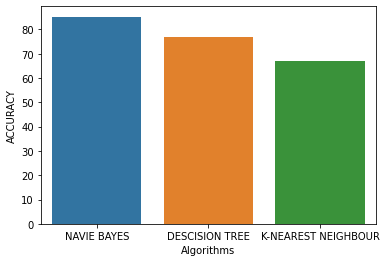

In [34]:
plt.xlabel("Algorithms")
plt.ylabel("ACCURACY")
sns.barplot(x=algo,y=score)

**NAVIE BAYES PERFORMS BETTER ON THE ALGORITHM OVER THE DATASET THAT WE PROVIDED**